# Template for creating current and bathymetry files

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Initialize domain

In [6]:
# Length of the domain in meters
Lx = 20e3
Ly = 10e3

# Grid spacing in meters
dx = 10
dy = 10

x = np.arange(0, Lx, dx)
y = np.arange(0, Ly, dy)

### Define currents
In this example, we're creating a zonal cosine jet with a maximum speed of 0.3 m/s

In [10]:
output_current = "data/currents/constant_vertical_gradient.nc"

# Define u and v current components 
# Maximum speed in m/s
Umax = 3
# Number of points in x and y
nx, ny = len(x), len(y)

xc = np.linspace(0, 1, ny)
u = Umax*xc
u = np.tile(u, (nx, 1)).T
v = np.zeros((ny, nx))

left_quarter_index = nx // 4
u[:, :left_quarter_index] = 0

ds = xr.Dataset(
    data_vars={
        "x": (["x"], x),
        "y": (["y"], y),
        "u": (["y", "x"], u, {"long_name": "u", "units": "m/s"}),
        "v": (["y", "x"], v, {"long_name": "v", "units": "m/s"}),
    })

ds.to_netcdf(output_current, format="NETCDF3_CLASSIC")

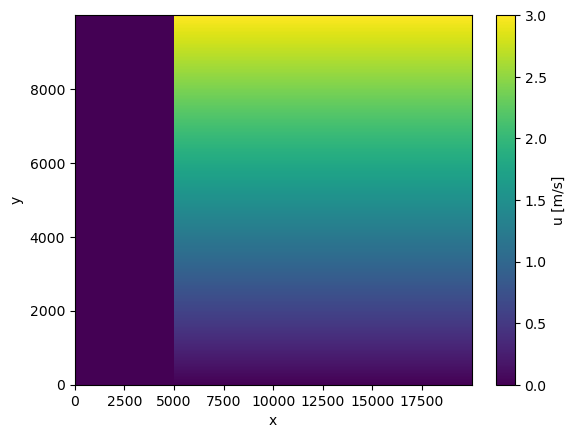

In [11]:
ds.u.plot.pcolormesh()

### Define bathymetry
Here, we will consider constant deep water 

In [12]:
output_bathy = "data/bathymetry/bathy_constant_vertical_gradient.nc"

# Considering a constant depth of 4km
D = 4e3 
depth = D*np.ones((ny, nx))

ds = xr.Dataset(
    data_vars={
        "x": (["x"], x),
        "y": (["y"], y),
        "depth": (["y", "x"], depth, {"long_name": "depth", "units": "m"}),
    })

#ds.to_netcdf(output_bathy, format="NETCDF3_CLASSIC")